Consider the following model

<h3>Variables</h3>:

Let $x$ be the stock of legal guns<br/>
Let $y$ be the stock of illegal guns<br/>
Let $z$ be the rate of gun violence<br/>

<h3>Parameters</h3>

Let $\tau$ be the rate of theft of legal guns<br/>
Let $I$ be the flow of llegal gun imports from America<br/>
Let $\alpha$ be the rate of crime per legal gun<br/>
Let $\beta$ be  the rate of crime per illegal gun<br/>
Let $C$ be the rate of legal gun aquisitions<br/>

<h3>Model</h3>:

\begin{equation*}
\begin{align*}
\dot{x} &= C - \tau \cdot x \\


\dot{y} &= \tau \cdot x + I \\

z &= \alpha \cdot x + \beta \cdot y \\
\end{align*}
\end{equation*}

<h3>Some Notes</h3>:

This model is fairly simplistic. Some potential dynamics not captured are gun culture's effect on gun purchases, and the dependence of gun culture
on the amount of crime (more crime => people like guns less), the sink of gun buybacks, the effect of a shrinking legal gun stock to steal from on 
the rate of import of illegal guns from America, and other things. Also, we would expect $\tau$ to go down as the stock of legal guns decreases, as
all the easy to steal guns would go first.


In [15]:
import numpy as np

def model(t, v, tau, I, C):
    return np.array([C - tau*v[0], tau*v[0] + I])

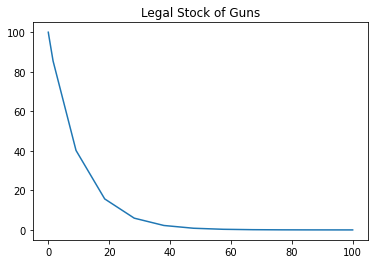

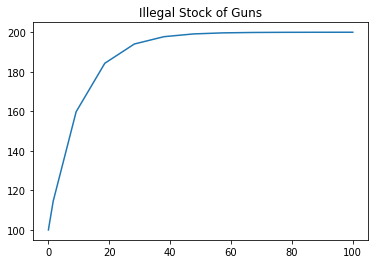

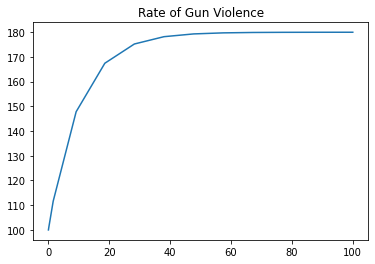

In [17]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

x_0 = 100
y_0 = 100
z_0 = 0

tau = 0.1
I = 0
alpha = 0.1
beta = 0.9
C = 0

solve = solve_ivp(model, (0,100), [x_0, y_0, z_0], args=(tau, I, C))

plt.title("Legal Stock of Guns")
plt.plot(solve.t, solve.y[0])

plt.show()

plt.title("Illegal Stock of Guns")
plt.plot(solve.t, solve.y[1])

plt.show()

plt.title("Rate of Gun Violence")

f = alpha * solve.y[0]  + beta * solve.y[1]

plt.plot(solve.t, f)

plt.show()